In [1]:
cd ..

/home/noahb/fv3net


In [2]:
import xarray as xr
from src.data.advect import *
import os

# Compute the Apparent Sources

This will need to be refactored!

In [3]:
if not os.path.exists("data/interim/apparent_sources.zarr"):

    q1 = apparent_heating(ds.temp, ds.z, ds.w, ds.dtemp).rename("apparent_heating").assign_attrs(units="K/s")
    q2 = apparent_source(ds.qv, ds.z, ds.dqv).rename("apparent_moistening").assign_attrs(units="kg/kg/s")

    xr.Dataset({'q1': q1, 'q2': q2}).to_zarr("data/interim/apparent_sources.zarr")

# Analyze sources

You can use this API to open the complete dataset in the future:

In [4]:
from src.data import open_data
ds = open_data(sources=True)

In [5]:
def plot(x):
    x = x.load()
    x.plot(vmax=x.quantile(.99), yincrease=False)

Zonal averages of the Q1 and Q2:

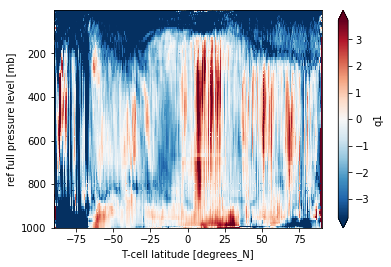

In [6]:
plot(ds.q1.mean(['grid_xt', 'time'])*86400)

There is a large amount of cooling the stratosphere. Why?

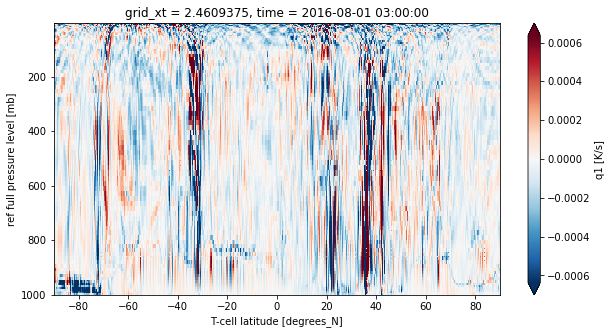

In [7]:
plt.figure(figsize=(10,5))
plot(ds.q1.isel(grid_xt=10, time=0))

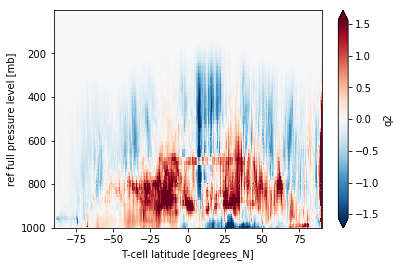

In [8]:
plot(ds.q2.mean(['grid_xt', 'time'])*86400*1000)

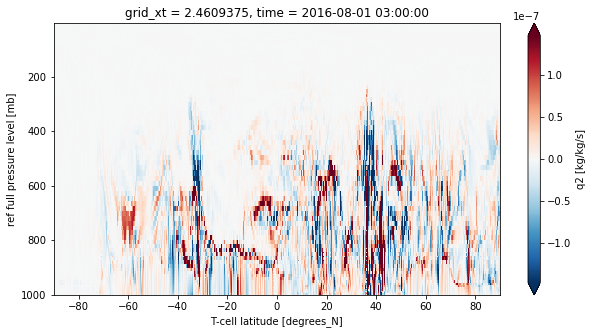

In [9]:
plt.figure(figsize=(10,5))
plot(ds.q2.isel(grid_xt=10, time=0))